*Lorenz 63*

In [ ]:
!pip install reservoirpy

In [ ]:
import reservoirpy as res

import numpy as np
import pandas as pd

import sys
import scipy.sparse as sparse
from scipy.sparse import linalg
import matplotlib.pyplot as plt
# from matplotlib import cm
# import math
import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop, SGD, Adagrad, Adadelta
from numpy import genfromtxt

In [ ]:
# %pip install quantumreservoirpy

In [ ]:
%pip install reservoirpy
# Uncomment if running for first time

In [ ]:
from reservoirpy.datasets import lorenz

In [ ]:
##### CONSTANTS #####

# totalSteps/train/test
# 5000/4500/500
# 10000/9000/1000
# 20000/18000/2000

number_of_features = 3
reservoir_dim = 300
edge_creation_prob = 0.1
spectral_radius = 1.2

train_test_split_ratio = 0.05
n_timesteps = 20000

sigma, rho, beta, h = 10, 28, 8/3, 0.02

In [ ]:
##### DATASET #####

def dataset(n_timesteps):
    training_split = train_test_split_ratio
    n_timesteps = n_timesteps
    data = lorenz(n_timesteps=n_timesteps, sigma=sigma, rho=rho, beta=beta, h=h)
    training_data = np.array(data[:int(n_timesteps*training_split)])
    testing_data = np.array(data[int(n_timesteps*training_split):])

    return data, training_data, testing_data

In [ ]:
data, _,_= dataset(n_timesteps)

In [ ]:
shifter, trainlength = 0, 18000

In [ ]:
# training the reservoir
train = data[shifter:shifter+trainlength,:]
label = data[1+shifter:1+shifter+trainlength,:]
print('np.shape(train)', np.shape(train))
print('np.shape(label)', np.shape(label))
print(train)
print(label)

In [ ]:
y_train = label - train
x_train = train
print('np.shape(y_train)', np.shape(y_train))
print('np.shape(x_train)', np.shape(x_train))

In [ ]:
#building of neural network model
#activation function used is tanh

model = Sequential()
model.add(Dense(3, input_dim=3, activation='tanh'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(3, activation='tanh'))

In [ ]:
#compilation of model
model.compile(loss='mean_absolute_error', optimizer='SGD', metrics=['mae','accuracy'])
#fitting of the model
model.fit(x_train, y_train,batch_size=128, epochs=20, validation_split=0.2)

#weights of the network are computed using backpropagation optimized by the stochastic gradient descent
model.save_weights("./weights_Shift"+str(shifter)+"K")

Epoch 1/20
113/113 [==============================] - 2s 6ms/step - loss: 0.7697 - mae: 0.7697 - accuracy: 0.4990 - val_loss: 0.7157 - val_mae: 0.7157 - val_accuracy: 0.5156
Epoch 2/20
113/113 [==============================] - 0s 4ms/step - loss: 0.6670 - mae: 0.6670 - accuracy: 0.5180 - val_loss: 0.6713 - val_mae: 0.6713 - val_accuracy: 0.5361
Epoch 3/20
113/113 [==============================] - 1s 4ms/step - loss: 0.6489 - mae: 0.6489 - accuracy: 0.6194 - val_loss: 0.6613 - val_mae: 0.6613 - val_accuracy: 0.6428
Epoch 4/20
113/113 [==============================] - 0s 4ms/step - loss: 0.6417 - mae: 0.6417 - accuracy: 0.6506 - val_loss: 0.6539 - val_mae: 0.6539 - val_accuracy: 0.6511
Epoch 5/20
113/113 [==============================] - 0s 4ms/step - loss: 0.6344 - mae: 0.6344 - accuracy: 0.6495 - val_loss: 0.6445 - val_mae: 0.6445 - val_accuracy: 0.6336
Epoch 6/20
113/113 [==============================] - 1s 5ms/step - loss: 0.6240 - mae: 0.6240 - accuracy: 0.6515 - val_loss: 0.63

In [ ]:
test = data[shifter+trainlength:-1,:]
label = data[1+shifter+trainlength:,:]
print('np.shape(train)', np.shape(test))
print('np.shape(label)', np.shape(label))
print(test)
print(label)

np.shape(train) (1999, 3)
np.shape(label) (1999, 3)
[[ 0.64105871  0.90174738 14.26616138]
 [ 0.70372562  1.07140379 13.53810607]
 [ 0.78830732  1.26859963 12.85191724]
 ...
 [ 2.07725677  4.45037536 22.84454693]
 [ 2.5216661   4.62078544 21.86214618]
 [ 2.92356614  4.88609447 20.98010084]]
[[ 0.70372562  1.07140379 13.53810607]
 [ 0.78830732  1.26859963 12.85191724]
 [ 0.89669112  1.50103165 12.20707718]
 ...
 [ 2.5216661   4.62078544 21.86214618]
 [ 2.92356614  4.88609447 20.98010084]
 [ 3.31158226  5.2481854  20.19822893]]


In [ ]:
y_test = label-test
print('np.shape(y_train)', np.shape(y_test))

np.shape(y_train) (1999, 3)


## Adam Bashford Integration Scheme
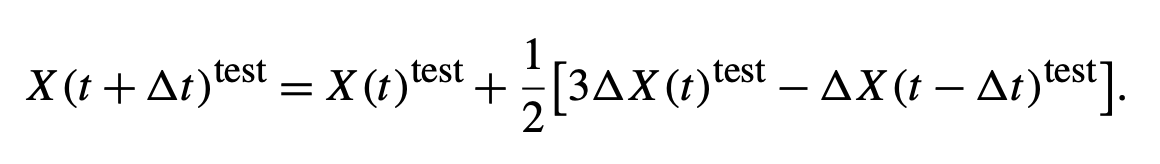

In [ ]:
predLength = 2000

In [ ]:
initial_input = np.array([x_train[-2],x_train[-1]])
print('np.shape(train)', np.shape(initial_input))
basePreds = model.predict(initial_input)
print(basePreds)

np.shape(train) (2, 3)
1/1 [==============================] - 0s 140ms/step
[[ 0.08480985  0.11710206 -0.939609  ]
 [ 0.08756029  0.11419978 -0.9350542 ]]


In [ ]:
preds = basePreds
input_series = [x_train[-1]]
for i in range(predLength):
  last, secondLast = preds[-1], preds[-2]
  input = input_series[-1] + 0.5*(3*last - secondLast)
  input_series.append(input)
  prediction = model.predict(np.array([input]),verbose=0)
  preds = np.append(preds,prediction, axis=0)
  # print(i)

print(preds)
print('np.shape(predictions)', np.shape(preds))

In [ ]:
print(input_series)
print('np.shape(predictions)', np.shape(input_series))
print('np.shape(y_train)', np.shape(y_test))

In [ ]:
y = np.transpose(y_test)
x = np.transpose(input_series[:-2])


fig, ax = plt.subplots(3, 1, figsize=(9, 9))
t = [i for i in range(trainlength, trainlength + predLength - 1)]
# t = [i for i in range(trainlength, trainlength + 50)]

temp = ['X', 'Y', 'Z']
color_table = ['red', 'green', 'blue']
for i in range(3):
  title = "Artifical Neural Network -- Timestep: 502000"
  if i == 0:
    new_title = title + '\n' + "Predicted Lorenz " + temp[i] + " Data and Actual Lorenz " + temp[i] + " Data"
  else:
    new_title = "Predicted Lorenz " + temp[i] + " Data and Actual Lorenz " + temp[i] + " Data"
  ax[i].set_title(new_title)
  ax[i].set_xlabel("timestep")
  # ax[i].plot(t, y[i, :50], label=temp[i], color=color_table[i])
  # ax[i].plot(t, x[i, :50], label=temp[i]+"_pred")
  ax[i].plot(t, y[i], label=temp[i], color=color_table[i])
  ax[i].plot(t, x[i], label=temp[i]+"_pred")
  ax[i].legend()

fig.tight_layout()

plt.show()

In [ ]:
def plot_graphs(test, pred, title=None):
  fig, ax = plt.subplots(3, 1, figsize=(9, 9))

  t = [i for i in range(trainlength, trainlength + predLength)]
  ax[i].set_xlabel("timestep")
  ax[i].plot(t, test[:, i], label=temp[i], color=color_table[i])
  ax[i].plot(t, pred[:, i], label=temp[i]+"_pred")
  ax[i].legend()

  fig.tight_layout()

  plt.show()

In [ ]:
def average_forecast_horizon(preds, actual):
  s = np.std(actual)
  x, y, z = 0, 0, 0
  for i, vals in enumerate(preds):
    x += (preds[i][0] - actual[i][0]) < s
    y += (preds[i][1] - actual[i][1]) < s
    z += (preds[i][2] - actual[i][2]) < s
  return x/len(preds), y/len(preds), z/len(preds)

In [ ]:
print(average_forecast_horizon(x, y))